# **Social Media Sentiments Analysis**

## This project focuses on analyzing user sentiments across major social media platforms — Facebook, Twitter, and Instagram — using a dataset containing 732 posts. The goal is to understand user emotion trends, popular hashtags, and platform engagement through both Python-based preprocessing and Power BI visualizations.


## Import Libraries

In [3]:
# For analysis and cleaning
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('sentimentdataset(1).csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
df.shape

(732, 15)

In [6]:
# drop column Unnamed: 0.1
df.drop(columns='Unnamed: 0.1',inplace=True)

In [7]:
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [8]:
df.isnull().sum()

Id           0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [9]:
df.dtypes

Id             int64
Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [11]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

## EDA

In [12]:
df.head(1)

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


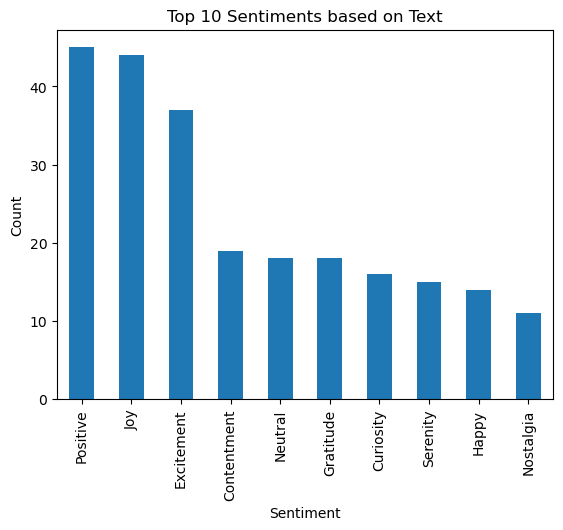

In [13]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [14]:
df['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

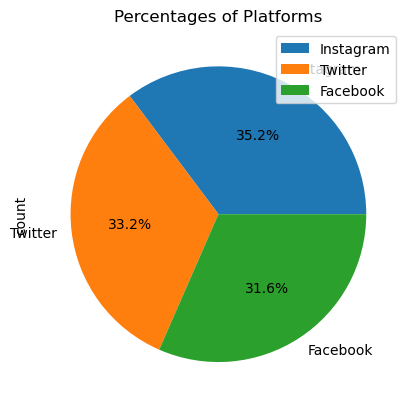

In [15]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()


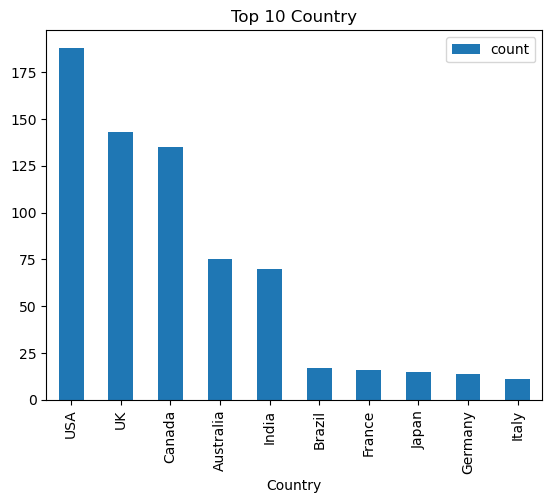

In [16]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

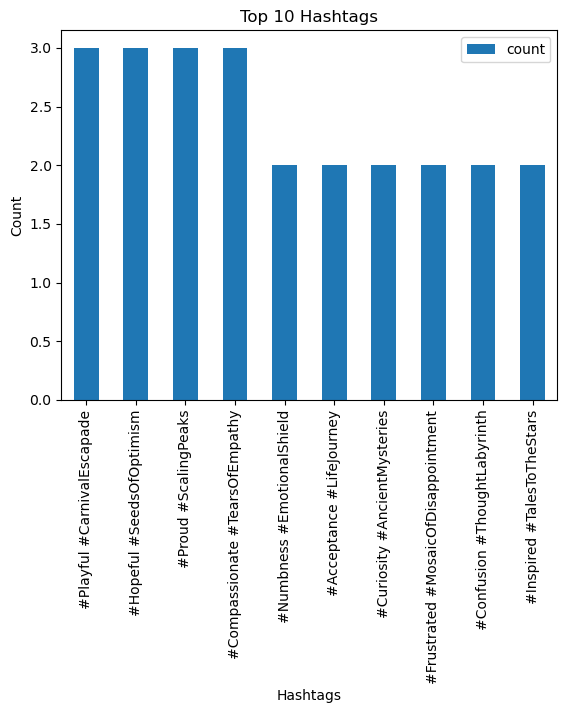

In [17]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [18]:
# Descrip data nurimucal
df.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [19]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")


Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


## Top 10 hashtags retweeted

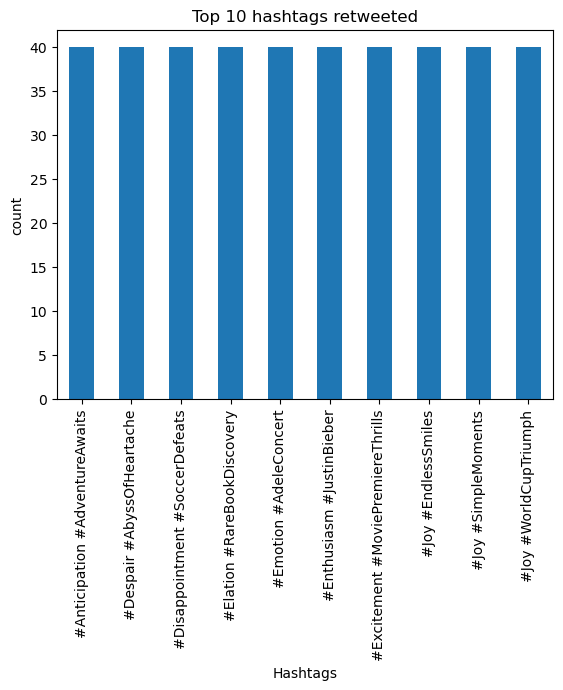

In [20]:
H_R=df.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

## Top Platforms by Total Likes

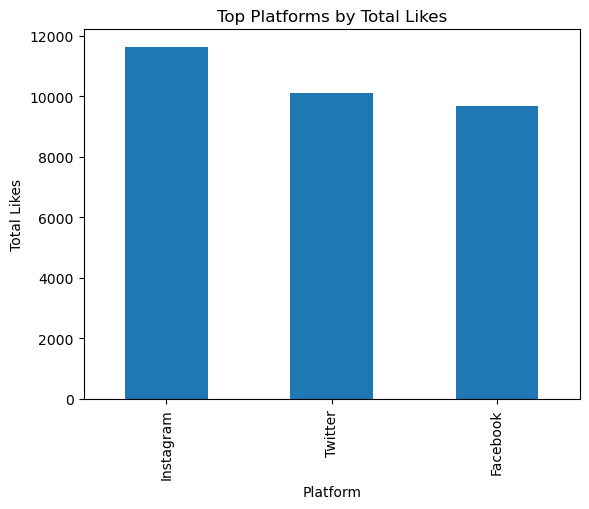

In [22]:
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

## Top country likes

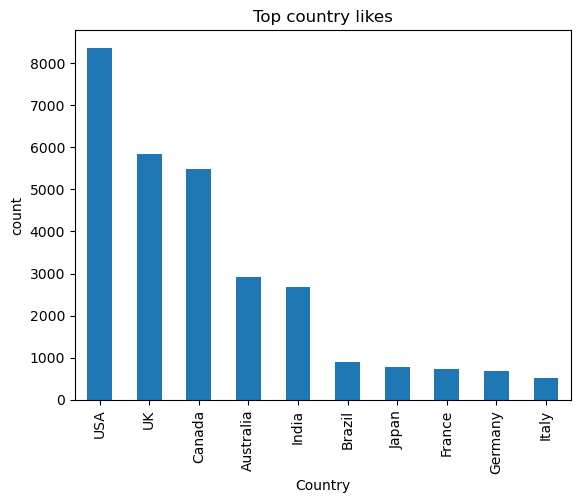

In [21]:
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

## segment users for each platform

In [26]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

# **Facebook**


### Top 10 hashtags retweeted

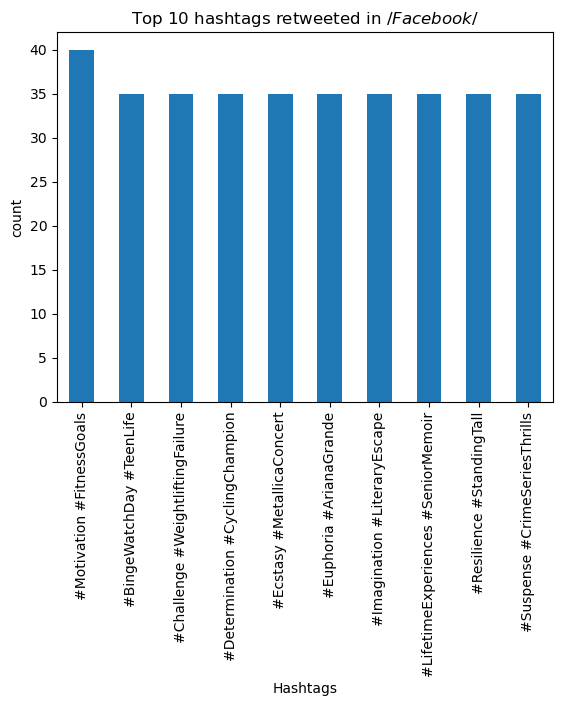

In [27]:
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Top Users by Total Likes IN Facebook

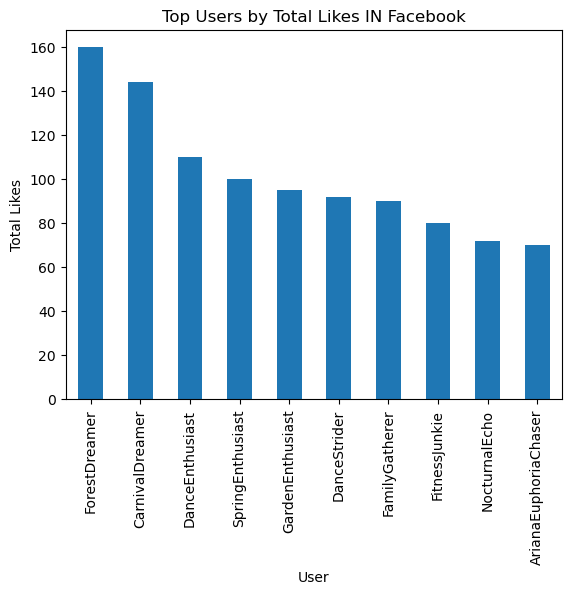

In [28]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar')
plt.title('Top Users by Total Likes IN Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

## Cumulative Likes Over Years on Facebook

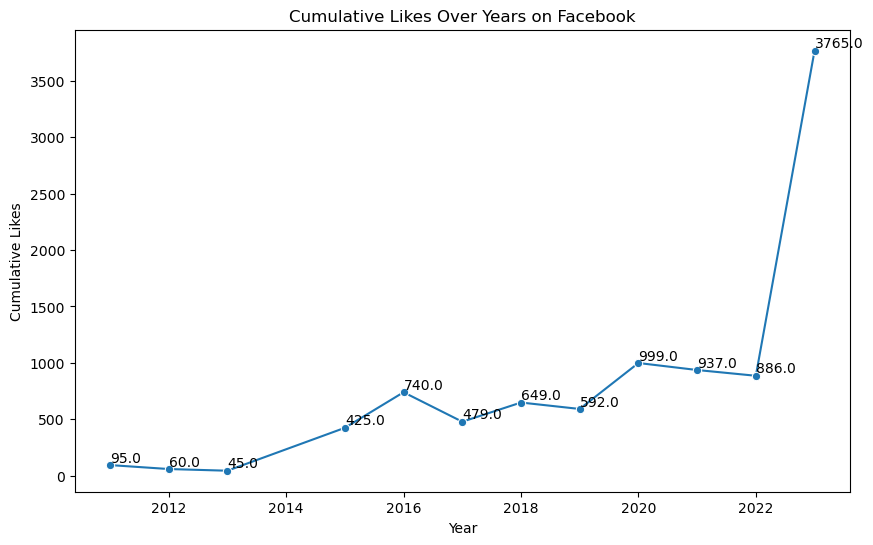

In [29]:
f = Facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

## Cumulative Retweets Over Years on Facebook

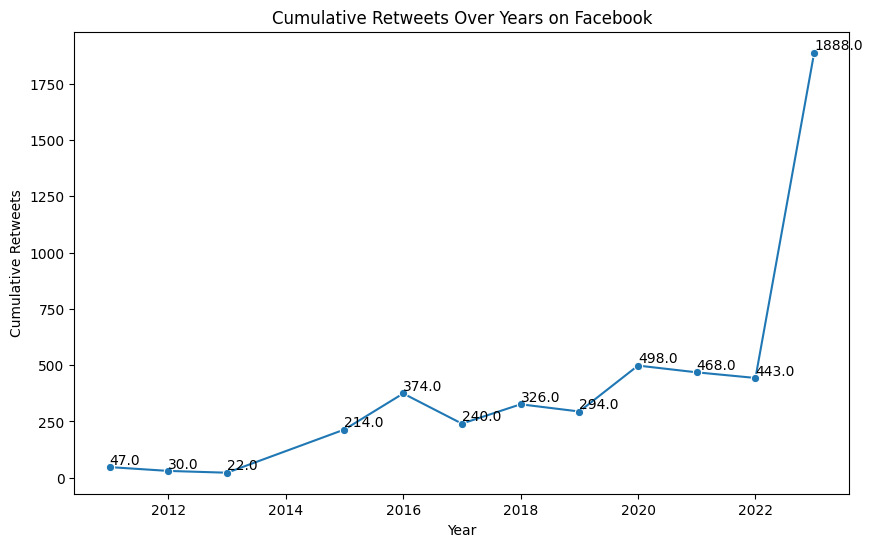

In [25]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

# **Twitter**

### Top 10 hashtags retweeted

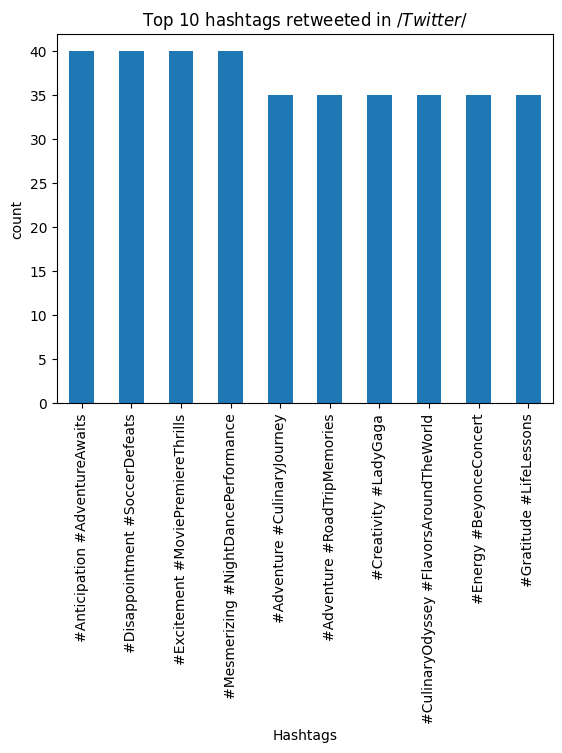

In [26]:
H_R_t=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Top Users by Total Likes in Twitter

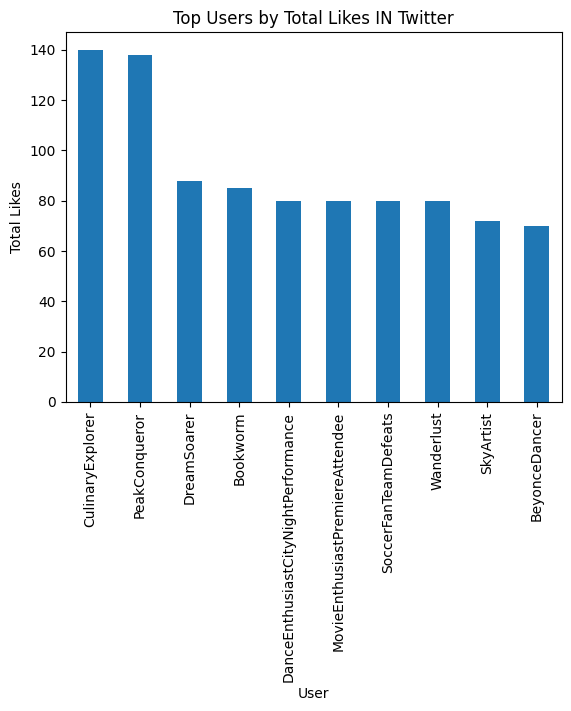

In [27]:
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(kind='bar')
plt.title('Top Users by Total Likes IN Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

## Cumulative Likes Over Years on Twitter

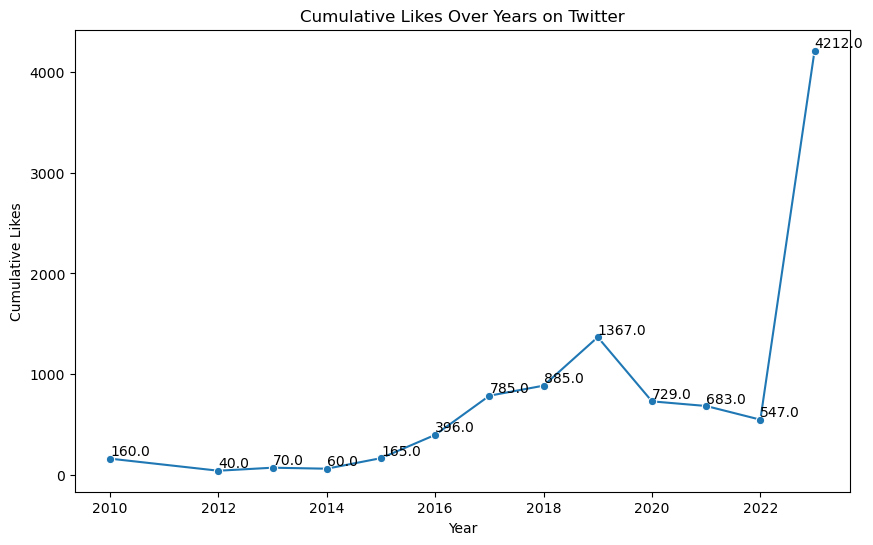

In [30]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

## Cumulative Retweets Over Years on Twitter

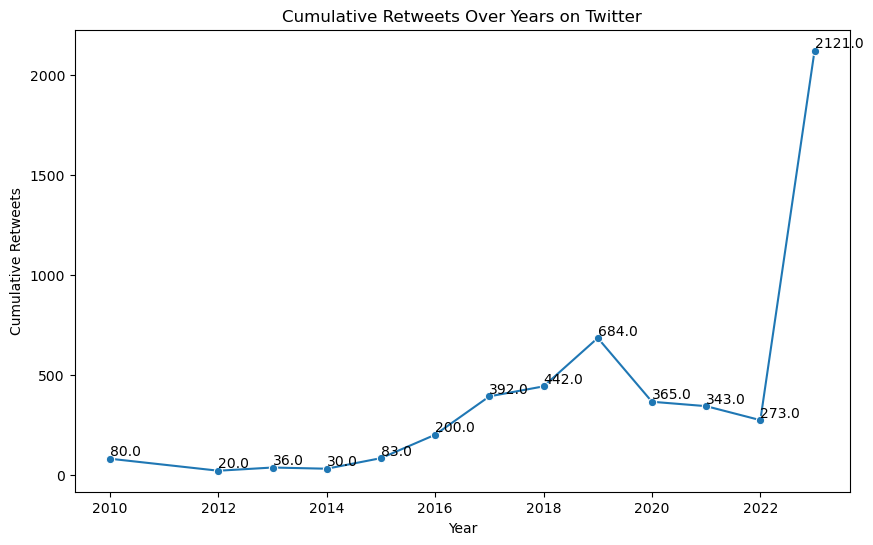

In [31]:
f = Twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

# **Instagram**

### Top 15 hashtags retweeted

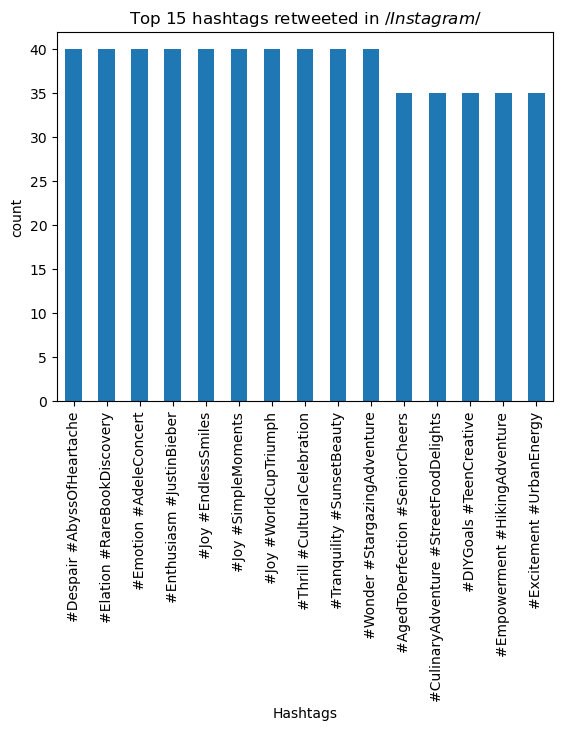

In [32]:
H_R_i=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(kind='bar')
plt.title('Top 15 hashtags retweeted in $/ Instagram $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Top Users by Total Likes in Instagram

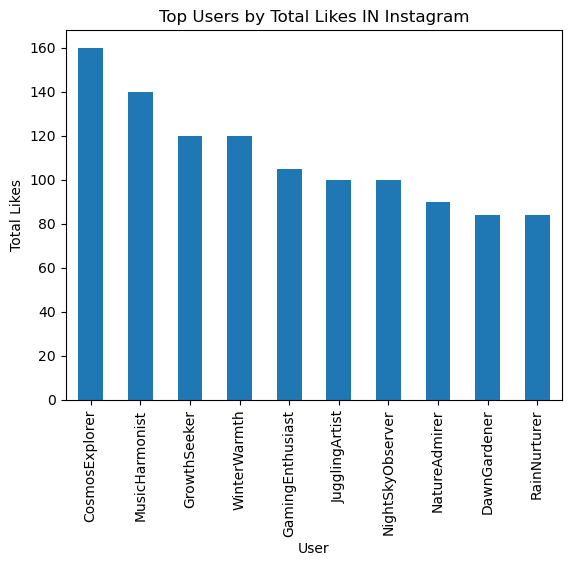

In [52]:
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(kind='bar')
plt.title('Top Users by Total Likes IN Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

## Cumulative Likes Over Years on Instagram

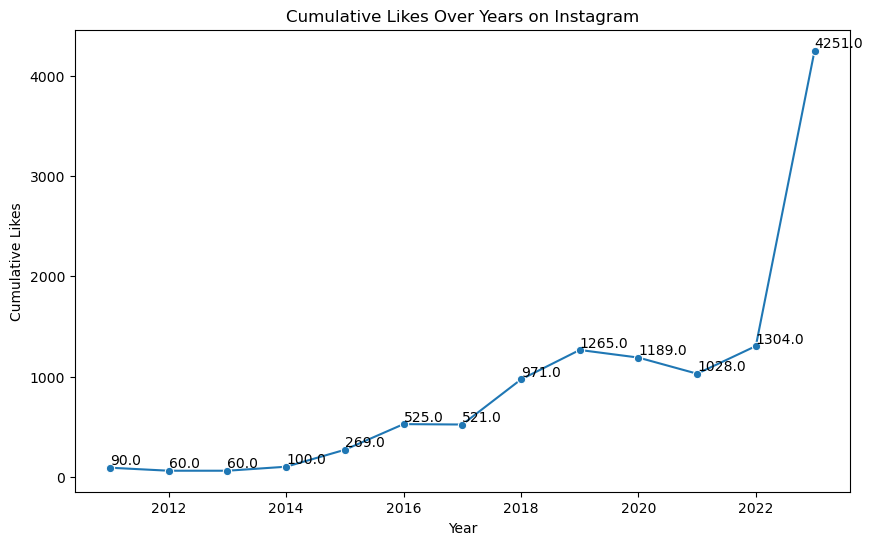

In [48]:
f = Instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

## Cumulative Retweets Over Years on Instagram

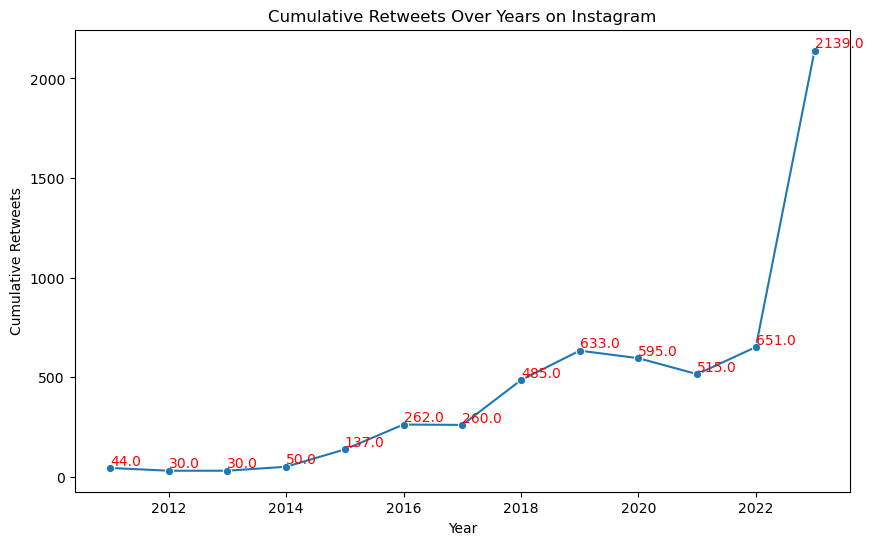

In [44]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom',color='red')

plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()